# Bank Complaints Resolution

In [ ]:
#importing libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [ ]:
#loading dataset

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Pre processing

In [ ]:
path = "copy_path_here"
df = pd.read_csv('/content/drive/MyDrive/complaints.csv')

In [ ]:
#renaming unnamed column with complaint_no

df.rename(columns={'Unnamed: 0': 'Complaint_No'}, inplace=True)

In [ ]:
df.head()

,Complaint_No,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [ ]:
# checking what all unique items are there in product column

unique=df["product"].unique()
unique

array(['credit_card', 'retail_banking', 'credit_reporting',
       'mortgages_and_loans', 'debt_collection'], dtype=object)

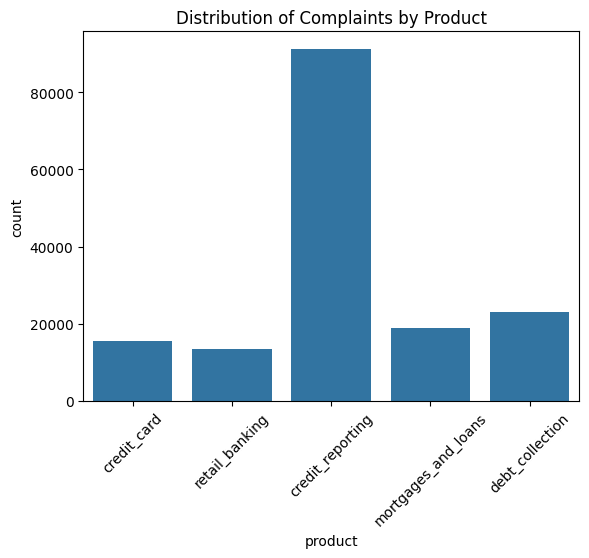

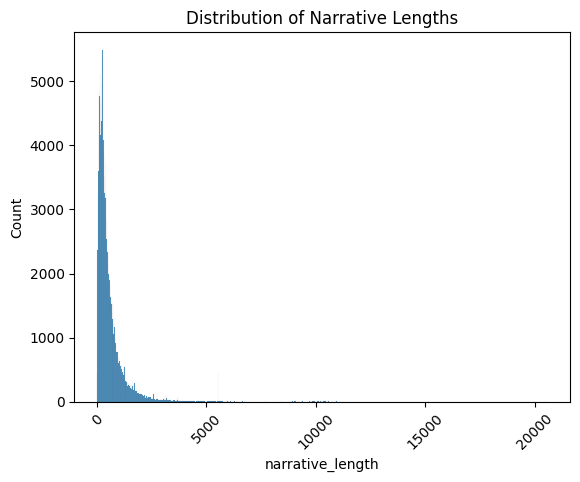

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='product', data=df)
plt.title('Distribution of Complaints by Product')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

# Histogram of narrative lengths, handling NaN values
df['narrative_length'] = df['narrative'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
sns.histplot(df['narrative_length'])
plt.title('Distribution of Narrative Lengths')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


In [ ]:
#encoding all the labels that are found and adding to the table

df_encoded = pd.get_dummies(df['product'].values,dtype = int) #use dtype for 1 and 0
df = pd.concat([df, df_encoded], axis=1)
df.head()

,Complaint_No,product,narrative,narrative_length,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking
0,0,credit_card,purchase order day shipping amount receive pro...,1705,1,0,0,0,0
1,1,credit_card,forwarded message date tue subject please inve...,904,1,0,0,0,0
2,2,retail_banking,forwarded message cc sent friday pdt subject f...,1230,0,0,0,0,1
3,3,credit_reporting,payment history missing credit report speciali...,903,0,1,0,0,0
4,4,credit_reporting,payment history missing credit report made mis...,851,0,1,0,0,0


In [ ]:
#dropping the column product

df = df.drop('product', axis=1)
df.head()

,Complaint_No,narrative,narrative_length,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking
0,0,purchase order day shipping amount receive pro...,1705,1,0,0,0,0
1,1,forwarded message date tue subject please inve...,904,1,0,0,0,0
2,2,forwarded message cc sent friday pdt subject f...,1230,0,0,0,0,1
3,3,payment history missing credit report speciali...,903,0,1,0,0,0
4,4,payment history missing credit report made mis...,851,0,1,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162421 entries, 0 to 162420
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Complaint_No         162421 non-null  int64 
 1   narrative            162411 non-null  object
 2   narrative_length     162421 non-null  int64 
 3   credit_card          162421 non-null  int64 
 4   credit_reporting     162421 non-null  int64 
 5   debt_collection      162421 non-null  int64 
 6   mortgages_and_loans  162421 non-null  int64 
 7   retail_banking       162421 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 9.9+ MB


In [ ]:
df.isnull().sum()  #checking for null values

Complaint_No            0
narrative              10
narrative_length        0
credit_card             0
credit_reporting        0
debt_collection         0
mortgages_and_loans     0
retail_banking          0
dtype: int64

In [ ]:
#dropping any null values

df=df.dropna()

In [ ]:
df.isnull().sum()  #checking for null values

Complaint_No           0
narrative              0
narrative_length       0
credit_card            0
credit_reporting       0
debt_collection        0
mortgages_and_loans    0
retail_banking         0
dtype: int64

In [ ]:
#checking for any duplicated values

df.duplicated().sum()

0

In [ ]:
# #plotting true and false ratio for each label

# import seaborn as sns
# import matplotlib.pyplot as plt

# df_melted = pd.melt(df, value_vars=["credit_card", "credit_reporting", "debt_collection", "mortgages_and_loans", "retail_banking"])

# Convert the melted values to "True" and "False"
# df_melted["value"] = df_melted["value"].astype(bool)

# # Create a countplot
# plt.figure(figsize=(10, 6))
# sns.set(style="whitegrid")
# ax = sns.countplot(x="variable", hue="value", data=df_melted)

# # Add labels and title
# ax.set(xlabel="Categories", ylabel="Count", title="Count of True and False for Each Category")
# plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
# plt.show()

# cleaning text

In [ ]:
#lower case conversion

df["narrative"]=df["narrative"].str.lower()
df.head()

,Complaint_No,narrative,narrative_length,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking
0,0,purchase order day shipping amount receive pro...,1705,1,0,0,0,0
1,1,forwarded message date tue subject please inve...,904,1,0,0,0,0
2,2,forwarded message cc sent friday pdt subject f...,1230,0,0,0,0,1
3,3,payment history missing credit report speciali...,903,0,1,0,0,0
4,4,payment history missing credit report made mis...,851,0,1,0,0,0


In [ ]:
# removing html tags

#!pip install beautifulsoup4


In [ ]:
from bs4 import BeautifulSoup

## check if there is html tags

def has_html_tags(text):  #creating function has_html_tags
    soup = BeautifulSoup(text, 'html.parser')  #passing text through parser so it creates soup object
    return bool(soup.find())  #returns boolean by calling find method to soup object.

df['has_html_tags'] = df['narrative'].apply(has_html_tags) #creates new column with boolean

In [ ]:
df.head()

,Complaint_No,narrative,narrative_length,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking,has_html_tags
0,0,purchase order day shipping amount receive pro...,1705,1,0,0,0,0,False
1,1,forwarded message date tue subject please inve...,904,1,0,0,0,0,False
2,2,forwarded message cc sent friday pdt subject f...,1230,0,0,0,0,1,False
3,3,payment history missing credit report speciali...,903,0,1,0,0,0,False
4,4,payment history missing credit report made mis...,851,0,1,0,0,0,False


In [ ]:
#checking html tags count

count_true = df['has_html_tags'].sum()
count_true

0

In [ ]:
# by using regular expressions

import re

def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

html_text = "<p>This is a <b>sample</b> HTML text.</p>"
clean_text = remove_html_tags(html_text)
print(clean_text)


This is a sample HTML text.


In [ ]:
#checking html tags in dataset

df = df.drop('has_html_tags', axis=1)
df

,Complaint_No,narrative,narrative_length,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking
0,0,purchase order day shipping amount receive pro...,1705,1,0,0,0,0
1,1,forwarded message date tue subject please inve...,904,1,0,0,0,0
2,2,forwarded message cc sent friday pdt subject f...,1230,0,0,0,0,1
3,3,payment history missing credit report speciali...,903,0,1,0,0,0
4,4,payment history missing credit report made mis...,851,0,1,0,0,0
...,...,...,...,...,...,...,...,...
162416,162416,name,4,0,0,1,0,0
162417,162417,name,4,1,0,0,0,0
162418,162418,name,4,0,0,1,0,0
162419,162419,name,4,1,0,0,0,0


In [ ]:
#removing emojis

# !pip install emoji
# !pip install --upgrade emoji
# !pip install regex

In [ ]:
import regex
import pandas as pd

# Function to check if a string contains emojis using a Unicode character property
def has_emoji(text):
    emoji_pattern = regex.compile(r'\p{Emoji}', flags=regex.UNICODE)
    return bool(emoji_pattern.search(text))


has_emojis =  df['narrative'].apply(has_emoji)

has_emojis

0         False
1         False
2         False
3         False
4         False
          ...  
162416    False
162417    False
162418    False
162419    False
162420    False
Name: narrative, Length: 162411, dtype: bool

In [ ]:
has_emojis.sum()

0

In [ ]:
#removing urls

import re
def remove_url(text):
    pattern=re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)


df["narrative"]=df["narrative"].apply(remove_url)

df.head()

,Complaint_No,narrative,narrative_length,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking
0,0,purchase order day shipping amount receive pro...,1705,1,0,0,0,0
1,1,forwarded message date tue subject please inve...,904,1,0,0,0,0
2,2,forwarded message cc sent friday pdt subject f...,1230,0,0,0,0,1
3,3,payment history missing credit report speciali...,903,0,1,0,0,0
4,4,payment history missing credit report made mis...,851,0,1,0,0,0


In [ ]:
#removing punctuation

import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
punc=string.punctuation

In [ ]:
def remove_punc(text):
    return text.translate(str.maketrans('', '',punc))

df["narrative"]=df["narrative"].apply(remove_punc)
df.head()

,Complaint_No,narrative,narrative_length,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking
0,0,purchase order day shipping amount receive pro...,1705,1,0,0,0,0
1,1,forwarded message date tue subject please inve...,904,1,0,0,0,0
2,2,forwarded message cc sent friday pdt subject f...,1230,0,0,0,0,1
3,3,payment history missing credit report speciali...,903,0,1,0,0,0
4,4,payment history missing credit report made mis...,851,0,1,0,0,0


In [ ]:
#removing stopwords

from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

df["narrative"]=df["narrative"].apply(lambda x: remove_stopwords(x))

df.head()

,Complaint_No,narrative,narrative_length,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking
0,0,purchase order day shipping amount receive pro...,1705,1,0,0,0,0
1,1,forwarded message date tue subject please inve...,904,1,0,0,0,0
2,2,forwarded message cc sent friday pdt subject f...,1230,0,0,0,0,1
3,3,payment history missing credit report speciali...,903,0,1,0,0,0
4,4,payment history missing credit report made mis...,851,0,1,0,0,0


In [ ]:
df

,Complaint_No,narrative,narrative_length,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking
0,0,purchase order day shipping amount receive pro...,1705,1,0,0,0,0
1,1,forwarded message date tue subject please inve...,904,1,0,0,0,0
2,2,forwarded message cc sent friday pdt subject f...,1230,0,0,0,0,1
3,3,payment history missing credit report speciali...,903,0,1,0,0,0
4,4,payment history missing credit report made mis...,851,0,1,0,0,0
...,...,...,...,...,...,...,...,...
162416,162416,name,4,0,0,1,0,0
162417,162417,name,4,1,0,0,0,0
162418,162418,name,4,0,0,1,0,0
162419,162419,name,4,1,0,0,0,0


In [ ]:
#tokenize

import nltk
nltk.download('punkt')
from nltk import word_tokenize, sent_tokenize

# Function to apply sentence and word tokenization
def tokenize_text(text):
    sentences = sent_tokenize(text)
    words = [word_tokenize(sentence) for sentence in sentences]
    return words

df['Complaint_tokenized_text'] = df['narrative'].apply(tokenize_text)

df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Complaint_No,narrative,narrative_length,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking,Complaint_tokenized_text
0,0,purchase order day shipping amount receive pro...,1705,1,0,0,0,0,"[[purchase, order, day, shipping, amount, rece..."
1,1,forwarded message date tue subject please inve...,904,1,0,0,0,0,"[[forwarded, message, date, tue, subject, plea..."
2,2,forwarded message cc sent friday pdt subject f...,1230,0,0,0,0,1,"[[forwarded, message, cc, sent, friday, pdt, s..."
3,3,payment history missing credit report speciali...,903,0,1,0,0,0,"[[payment, history, missing, credit, report, s..."
4,4,payment history missing credit report made mis...,851,0,1,0,0,0,"[[payment, history, missing, credit, report, m..."


In [ ]:
df["Complaint_tokenized_text"][0][0]

['purchase',
 'order',
 'day',
 'shipping',
 'amount',
 'receive',
 'product',
 'week',
 'sent',
 'followup',
 'email',
 'exact',
 'verbiage',
 'paid',
 'two',
 'day',
 'shipping',
 'received',
 'order',
 'company',
 'responded',
 'im',
 'sorry',
 'inform',
 'due',
 'unusually',
 'high',
 'order',
 'volume',
 'order',
 'shipped',
 'several',
 'week',
 'stock',
 'since',
 'early',
 'due',
 'high',
 'demand',
 'although',
 'continuing',
 'take',
 'order',
 'guaranteeing',
 'receive',
 'order',
 'place',
 'due',
 'time',
 'mask',
 'order',
 'exact',
 'shipping',
 'date',
 'right',
 'however',
 'guarantee',
 'ship',
 'soon',
 'soon',
 'delivers',
 'product',
 'u',
 'getting',
 'small',
 'shipment',
 'shipping',
 'first',
 'come',
 'first',
 'served',
 'basis',
 'appreciate',
 'patience',
 'fulfill',
 'order',
 'quickly',
 'recommend',
 'keeping',
 'order',
 'lose',
 'place',
 'line',
 'cancel',
 'distributor',
 'stock',
 'moment',
 'prefer',
 'cancel',
 'please',
 'note',
 'ask',
 'via',
 

In [ ]:
# splitting data

X = df['narrative'].values

In [ ]:
X

array(['purchase order day shipping amount receive product week sent followup email exact verbiage paid two day shipping received order company responded im sorry inform due unusually high order volume order shipped several week stock since early due high demand although continuing take order guaranteeing receive order place due time mask order exact shipping date right however guarantee ship soon soon delivers product u getting small shipment shipping first come first served basis appreciate patience fulfill order quickly recommend keeping order lose place line cancel distributor stock moment prefer cancel please note ask via email cancel accordance cancellation policy agreed checkout electronic inventory online requested order canceled refund issued canceled order sent verification order canceled refunded item particulate respirator refunded subtotal shipping tax total usd visa ending refund called disputed amount stated nothing needed submitted address issue recharged item removing 

In [ ]:
y = np.argmax(df[['credit_card', 'credit_reporting', 'debt_collection', 'mortgages_and_loans', 'retail_banking']].values, axis=1)

In [ ]:
y

array([0, 0, 4, ..., 2, 0, 1])

In [ ]:
y.shape

(162411,)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 , random_state=22)

In [ ]:
X_train.shape

(129928,)

In [ ]:
y_train.shape

(129928,)

In [ ]:
X_test.shape

(32483,)

In [ ]:
y_test.shape

(32483,)

# Model Building

In [ ]:
# Multinomial Naive Bayes because we have multiple labels

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report

# Create a pipeline with a TF-IDF vectorizer and a Multinomial Naive Bayes classifier
model1 = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model
model1.fit(X_train, y_train)

# Predict on the test set
y_pred = model1.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# #CROSS VALIDATION

# from sklearn.model_selection import cross_val_score

# cv_scores = cross_val_score(model1, X, y, cv=5, scoring='accuracy')
# print(f"Cross-Validation Scores: {cv_scores}")
# print(f"Mean Accuracy: {np.mean(cv_scores):.2f}")


# BOW

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# # Create a pipeline with a CountVectorizer and a Multinomial Naive Bayes classifier
# model2 = make_pipeline(CountVectorizer(), MultinomialNB())

# # Train the model
# model2.fit(X_train, y_train)

# # Predict on the test set
# y_pred = model2.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")

# # Print classification report
# print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# y_train

In [ ]:
# #CROSS VALIDATION

# from sklearn.model_selection import cross_val_score

# cv_scores = cross_val_score(model2, X, y, cv=5, scoring='accuracy')
# print(f"Cross-Validation Scores: {cv_scores}")
# print(f"Mean Accuracy: {np.mean(cv_scores):.2f}")

In [ ]:
#!pip install datasets

!pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 13.3 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
# Importing Libraries

# Data Handling
import pandas as pd
import numpy as np
from datasets import Dataset, load_metric
import shutil
from collections import defaultdict

# Data Visualization
import plotly.express as px
import plotly.graph_objs as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.io as pio
from IPython.display import display
from plotly.offline import init_notebook_mode
import matplotlib.pyplot as plt
import seaborn as sns
init_notebook_mode(connected=True)

# Statistics & Mathematics
import scipy.stats as stats
import statsmodels.api as sm
from wordcloud import WordCloud, STOPWORDS
from scipy.stats import shapiro, skew, anderson, kstest, gaussian_kde,spearmanr
import math

# Transformers
import tensorflow as tf
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
from scipy.special import softmax
from transformers import BartTokenizer, BartForConditionalGeneration      # BERT Tokenizer and architecture
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments         # These will help us to fine-tune our model
from transformers import pipeline                                         # Pipeline
from transformers import DataCollatorForSeq2Seq                           # DataCollator to batch the data
import torch                                                              # PyTorch
import evaluate                                                           # Hugging Face's library for model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from torch import nn, optim

import time
import datetime
import gc
import random
from nltk.corpus import stopwords

import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler,random_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import transformers
from transformers import BertForSequenceClassification, AdamW, BertConfig,BertTokenizer,get_linear_schedule_with_warmup


# Other NLP libraries
from textblob import TextBlob                                             # This is going to help us fix spelling mistakes in texts
from sklearn.feature_extraction.text import TfidfVectorizer               # This is going to helps identify the most common terms in the corpus
import re                                                                 # This library allows us to clean text data
import nltk                                                               # Natural Language Toolkit
nltk.download('punkt')


# Hiding warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
tweets = X_train[:50]
labels = y[:50]

In [ ]:
# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [ ]:
# print(' Original: ', tweets[5])
# print()
# # Print the sentence split into tokens.
# print('Tokenized: ', tokenizer.tokenize(tweets[5]))
# print()
# # Print the sentence mapped to token ids.
# print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(tweets[5])))

In [ ]:
# 'max_len = 0

# # For every sentence...
# for sent in tweets:

#     # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
#     input_ids = tokenizer.encode(sent, add_special_tokens=True)

#     # Update the maximum sentence length.
#     max_len = max(max_len, len(input_ids))

# print('Max sentence length: ', max_len)'

In [ ]:
max_len = 50

In [ ]:
input_ids = []
attention_masks = []

# For every tweet...
for tweet in tweets:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        tweet,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = max_len,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                        truncation = True,
                   )

    # Add the encoded sentence to the list.
    input_ids.append(encoded_dict['input_ids'])

    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', tweets[0])
print('Token IDs:', input_ids[0])

Original:  pa letter remove inaccurate credit information may concern received copy credit report found following item error letter formal complaint inaccurate information list credit report information credit profile damaging effect credit standing doubt aware credit reporting law ensure bureau report accurate credit information inclusion inaccurate information mistake either reporting creditor part mistake credit report wrongfully denied credit highly embarrassing negatively impacted lifestyle following information need verified deleted credit report soon possible tx letter remove inaccurate credit information may concern received copy credit report found following item error letter formal complaint inaccurate information list credit report information credit profile damaging effect credit standing doubt aware credit reporting law ensure bureau report accurate credit information inclusion inaccurate information mistake either reporting creditor part mistake credit report wrongfully d

In [ ]:
# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
# val_size = int(0.2 * len(dataset))b
val_size = len(dataset)  - train_size
# test_size = int(0.05 * len(dataset))

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
# val_size = int(0.7 * len(val_dataset))
# test_size = len(val_dataset)  - val_size
# val_dataset, test_dataset= random_split(val_dataset, [val_size, test_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))
# print('{:>5,} test samples'.format(test_size))

   45 training samples
    5 validation samples


In [ ]:
# dataset = TensorDataset(input_ids, attention_masks, labels)
# val_size = int(len(dataset)*0.2)
# train_size = len(dataset)- int(len(dataset)*0.2)
# train_dataset, val_dataset = random_split(dataset, [train_size, val_size]

In [ ]:
# The DataLoader needs to know our batch size for training, so we specify it
# here. For fine-tuning BERT on a specific task, the authors recommend a batch
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order.
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [ ]:
# Load BertForSequenceClassification, the pretrained BERT model with a single
# linear classification layer on top.
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
        num_labels = 5, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# if device == "cuda:0":
# # Tell pytorch to run this model on the GPU.
#     model = model.cuda()
model = model.to(device)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [ ]:
# Number of training epochs. The BERT authors recommend between 2 and 4.
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 2

# Total number of training steps is [number of batches] x [number of epochs].
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================
    # Perform one full pass over the training set.
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')
    # Measure how long the training epoch takes.
    t0 = time.time()
    total_train_loss = 0
    model.train()
    for step, batch in enumerate(train_dataloader):
        # Unpack this training batch from our dataloader.
        #
        # As we unpack the batch, we'll also copy each tensor to the device using the
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        optimizer.zero_grad()
        output = model(b_input_ids,
                             token_type_ids=None,
                             attention_mask=b_input_mask,
                             labels=b_labels)
        loss = output.loss
        total_train_loss += loss.item()
        # Perform a backward pass to calculate the gradients.
        loss.backward()
        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()
        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)

    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)
    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(training_time))
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.
    print("")
    print("Running Validation...")
    t0 = time.time()
    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()
    # Tracking variables
    total_eval_accuracy = 0
    best_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0
    # Evaluate data for one epoch
    for batch in validation_dataloader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():
            output= model(b_input_ids,
                                   token_type_ids=None,
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
        loss = output.loss
        total_eval_loss += loss.item()
        # Move logits and labels to CPU if we are using GPU
        logits = output.logits
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))
    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    if avg_val_accuracy > best_eval_accuracy:
        torch.save(model, 'bert_model')
        best_eval_accuracy = avg_val_accuracy
    #print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    #print("  Validation took: {:}".format(validation_time))
    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )
print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 2 ========
Training...

  Average training loss: 1.63
  Training epcoh took: 0:00:02

Running Validation...
  Accuracy: 0.40

======== Epoch 2 / 2 ========
Training...

  Average training loss: 1.55
  Training epcoh took: 0:00:00

Running Validation...
  Accuracy: 0.60

Training complete!
Total training took 0:00:13 (h:mm:ss)


In [ ]:
model = torch.load('bert_model')

In [ ]:
X_test

array(['carefully reviewing credit report notice address unauthorized phone number report requesting security freeze report lexis nexus name appear credit report current residing address please delete following address report freeze information please delete following please delete following',
       'contacted equifax several time reguarding open auto loan local lender account removed report incorrectly effecting credit dramatically dropped score point ive contacted dealer informed still reporting equifax everything end correct also informed tried contact equifax self see problem told credit file anything',
       'disputed account reached many time failed account reported inaccurately incorrectly credit report',
       ...,
       'usaa reported credit card account closed settled case credit reporting agency stated negative reporting time preparing secure mortgage decided apply lender could sure report clear matter usaa staff first stated knowledge cited error credit agency finally s

In [ ]:
test_tweets = X_test[:20]

In [ ]:
test_input_ids = []
test_attention_masks = []
for tweet in test_tweets:
    encoded_dict = tokenizer.encode_plus(
                        tweet,
                        add_special_tokens = True,
                        max_length = max_len,
                        pad_to_max_length = True,
                        return_attention_mask = True,
                        return_tensors = 'pt',
                   )
    test_input_ids.append(encoded_dict['input_ids'])
    test_attention_masks.append(encoded_dict['attention_mask'])
test_input_ids = torch.cat(test_input_ids, dim=0)
test_attention_masks = torch.cat(test_attention_masks, dim=0)

In [ ]:
test_dataset = TensorDataset(test_input_ids, test_attention_masks)
test_dataloader = DataLoader(
            test_dataset, # The validation samples.
            sampler = SequentialSampler(test_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [ ]:
predictions = []
for batch in test_dataloader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        with torch.no_grad():
            output= model(b_input_ids,
                                   token_type_ids=None,
                                   attention_mask=b_input_mask)
            logits = output.logits
            logits = logits.detach().cpu().numpy()
            pred_flat = np.argmax(logits, axis=1).flatten()

            predictions.extend(list(pred_flat))

In [ ]:
df_output = pd.DataFrame()
#df_output['id'] = df_test['id']
df_output['target'] =predictions
df_output.to_csv('submission.csv',index=False)

In [ ]:
df_output.head()

,target
0,1
1,1
2,1
3,1
4,1


In [ ]:
#test_df.cleaned_text[13176]

NameError: name 'test_df' is not defined

In [ ]:
text='user second flight put cancelled flightled explanation missed first meeting outraged'

In [ ]:
def product(text):
    #text=clean_text(text)
    encoded_dict = tokenizer.encode_plus(
                        text,
                        add_special_tokens = True,
                        max_length = max_len,
                        pad_to_max_length = True,
                        return_attention_mask = True,
                        return_tensors = 'pt',
                   )
    test_input_ids=[encoded_dict['input_ids']]
    test_attention_masks=[encoded_dict['attention_mask']]
    test_input_ids = torch.cat(test_input_ids, dim=0).to(device)
    test_attention_masks = torch.cat(test_attention_masks, dim=0).to(device)
    with torch.no_grad():
        output= model(test_input_ids,
                               token_type_ids=None,
                               attention_mask=test_attention_masks)
        logits = output.logits
        logits = logits.detach().cpu().numpy()
        pred_flat = np.argmax(logits, axis=1).flatten()
        print(pred_flat)
    # if pred_flat==0:
    #     print("negative")
    # elif pred_flat==2:
    #     print("Positive")
    # else:
    #     print("Natural")

In [ ]:
product(text)

[3]


In [ ]:
text='chgfhgfgc hffhfgfhgf jfffhgff'

In [ ]:
product(text)

[1]
